Review 1:
Sentence 1: this movie was fantastic! - Sentiment Category: Very Positive
Sentence 2: the acting was superb and the plot kept me engaged throughout. - Sentiment Category: Very Positive

Review 2:
Sentence 1: i really didn't like this movie. - Sentiment Category: Negative
Sentence 2: the acting was terrible and the storyline was predictable. - Sentiment Category: Negative

Review 3:
Sentence 1: i thought this movie was okay. - Sentiment Category: Positive
Sentence 2: it had some good moments but overall it fell flat for me. - Sentiment Category: Positive

Review 4:
Sentence 1: one of the best movies i've seen in a long time. - Sentiment Category: Very Positive
Sentence 2: the cinematography was stunning and the performances were top-notch. - Sentiment Category: Positive



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


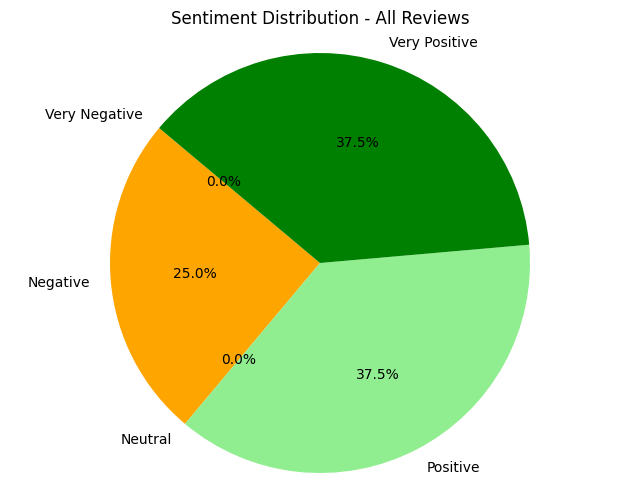

In [ ]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
import pandas as pd

# Download NLTK resources (if not already downloaded)
nltk.download('punkt')
nltk.download('vader_lexicon')

# Sample movie reviews
movie_reviews = [
    "This movie was fantastic! The acting was superb and the plot kept me engaged throughout.",
    "I really didn't like this movie. The acting was terrible and the storyline was predictable.",
    "I thought this movie was okay. It had some good moments but overall it fell flat for me.",
    "One of the best movies I've seen in a long time. The cinematography was stunning and the performances were top-notch."
]

# Tokenize the reviews into sentences
sentences = [sent_tokenize(review.lower()) for review in movie_reviews]

# Initialize SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Function to categorize sentiment score
def categorize_sentiment(score):
    if score <= -0.5:
        return "Very Negative"
    elif -0.5 < score <= -0.1:
        return "Negative"
    elif -0.1 < score <= 0.1:
        return "Neutral"
    elif 0.1 < score <= 0.5:
        return "Positive"
    else:
        return "Very Positive"

# Analyze sentiment and print sentiment category for each review
for i, review in enumerate(sentences):
    print(f"Review {i+1}:")
    for j, sentence in enumerate(review):
        sentiment_score = sia.polarity_scores(sentence)['compound']
        sentiment_category = categorize_sentiment(sentiment_score)
        print(f"Sentence {j+1}: {sentence} - Sentiment Category: {sentiment_category}")
    print()

sentiment_counts = {"Very Negative": 0, "Negative": 0, "Neutral": 0, "Positive": 0, "Very Positive": 0}
for review in sentences:
    for sentence in review:
        sentiment_score = sia.polarity_scores(sentence)['compound']
        sentiment_category = categorize_sentiment(sentiment_score)
        sentiment_counts[sentiment_category] += 1



# Create a pie chart for sentiment distribution
labels = sentiment_counts.keys()
sizes = sentiment_counts.values()
colors = ['red', 'orange', 'yellow', 'lightgreen', 'green']

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution - All Reviews')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [ ]:
import nltk
from nltk.corpus import movie_reviews

In [ ]:
from nltk.tokenize import sent_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

# Download NLTK resources (if not already downloaded)
nltk.download('punkt')
# Access movie_reviews corpus from NLTK
reviews = movie_reviews.fileids()

# Get movie review texts and their categories
movie_reviews_text = [movie_reviews.raw(review) for review in reviews]
movie_reviews_category = [movie_reviews.categories(review)[0] for review in reviews]



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


In [ ]:
len(movie_reviews.words())

1583820

In [ ]:
nltk.FreqDist(movie_reviews.words())

FreqDist({',': 77717, 'the': 76529, '.': 65876, 'a': 38106, 'and': 35576, 'of': 34123, 'to': 31937, "'": 30585, 'is': 25195, 'in': 21822, ...})

In [ ]:
nltk.FreqDist(movie_reviews.words()).most_common(15)

[(',', 77717),
 ('the', 76529),
 ('.', 65876),
 ('a', 38106),
 ('and', 35576),
 ('of', 34123),
 ('to', 31937),
 ("'", 30585),
 ('is', 25195),
 ('in', 21822),
 ('s', 18513),
 ('"', 17612),
 ('it', 16107),
 ('that', 15924),
 ('-', 15595)]

In [ ]:
# Tokenize the reviews into sentences
sentences = [sent_tokenize(review.lower()) for review in movie_reviews_text]

# Initialize SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Function to categorize sentiment score
def categorize_sentiment(score):
    if score <= -0.5:
        return "Very Negative"
    elif -0.5 < score <= -0.1:
        return "Negative"
    elif -0.1 < score <= 0.1:
        return "Neutral"
    elif 0.1 < score <= 0.5:
        return "Positive"
    else:
        return "Very Positive"

In [ ]:
# Analyze sentiment and print sentiment category for each review
sentiment_counts = {"Very Negative": 0, "Negative": 0, "Neutral": 0, "Positive": 0, "Very Positive": 0}
for review in sentences:
    for sentence in review:
        sentiment_score = sia.polarity_scores(sentence)['compound']
        sentiment_category = categorize_sentiment(sentiment_score)
        sentiment_counts[sentiment_category] += 1

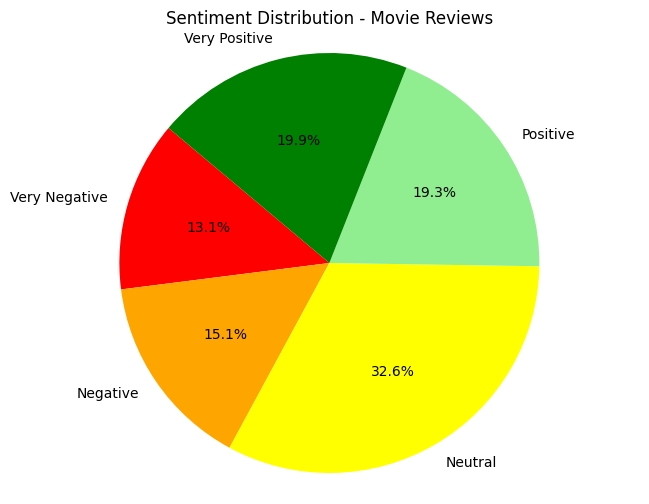

In [ ]:
# Create a pie chart for sentiment distribution
labels = sentiment_counts.keys()
sizes = sentiment_counts.values()
colors = ['red', 'orange', 'yellow', 'lightgreen', 'green']

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution - Movie Reviews')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()